# **ZMSI_Lab_7**
Klasyfikacja ras psów - studium przypadku

$\color{red}{Uwaga:}$

1- proszę pamiętać o zmianie słowa ***Album*** w nazwie pliku i uzupełnieniu swoich danych powyżej tego pola;

2- kluczowe polecenia proszę opatrzyć komentarzem;

3- wnioski, pod zadaniem, wpisujemy w polu tekstowym.

In [ ]:
# Podpisywanie pracy
NN = input("Podaj Imię i Nazwisko: ")
ALBUM = input("Podaj numer albumu: ")

Podaj Imię i Nazwisko: Kacper Gąsowski
Podaj numer albumu: 154845


In [ ]:
# Ocena pracy. Proszę nie zmieniać komórek z kodem pomocniczym do oceny.
punkty = []
max = int(45)

### **Zad 7.1** Przygotuj środowisko Colaboratory do uczenia CNN. Przygotuj odpowiednie zbiory danych bazując na wybranych 5 rasach psów wybranych ze zbioru Stanford_Dogs_Dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Struktura folderów
base_dir = '/content/drive/MyDrive/KUL/Obrazy/Images'
target_dir = '/content/drive/MyDrive/KUL/Laby7/datasets'
splits = ['train', 'val', 'test']
klasy = ['n02088364-beagle', 'n02089867-Walker_hound', 'n02092339-Weimaraner', 'n02093859-Kerry_blue_terrier', 'n02096585-Boston_bull']

for split in splits:
    for klasa in klasy:
        os.makedirs(os.path.join(target_dir, split, klasa), exist_ok=True)

In [ ]:
# Podział danych na zbiory: treningowy, walidacyjny i testowy oraz kopiowanie plików
test_size = 0.25
val_size = 0.33

for klasa in klasy:
    # Pobieramy wszystkie pliki w klasie
    sciezka_klasy = os.path.join(base_dir, klasa)
    pliki = os.listdir(sciezka_klasy)
    pelne_sciezki = [os.path.join(sciezka_klasy, f) for f in pliki]

    # Podział na zbiory: treningowy, walidacyjny i testowy
    train_files, test_files = train_test_split(pelne_sciezki, test_size=test_size, random_state=42)
    train_files, val_files = train_test_split(train_files, test_size=val_size, random_state=42)

    # Kopiowanie plików do odpowiednich folderów
    for plik in train_files:
        shutil.copy(plik, os.path.join(target_dir, 'train', klasa))
    for plik in val_files:
        shutil.copy(plik, os.path.join(target_dir, 'val', klasa))
    for plik in test_files:
        shutil.copy(plik, os.path.join(target_dir, 'test', klasa))

print("Podział zbioru zakończony.")

Podział zbioru zakończony.


In [ ]:
# Maksymalna wartość punktów za Zad 7.1: 15
punkty.append(15)

### **Zad 7.2.** Zaprojektuj własny model CNN do rozpoznawania wybranych ras psów?

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Przygotowanie generatorów danych
# Tworzenie obiektów ImageDataGenerator do normalizacji i augmentacji danych
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generatory dla zbiorów: treningowego, walidacyjnego i testowego
train_generator = train_datagen.flow_from_directory(
    os.path.join(target_dir, 'train'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    os.path.join(target_dir, 'val'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    os.path.join(target_dir, 'test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

# Definiowanie architektury CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(klasy), activation='softmax')  # Wyjście o liczbie klas = 5
])

# Kompilacja modelu
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Trenowanie modelu
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    verbose=1)

# Ocena modelu
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy:.2f}")

Found 433 images belonging to 5 classes.
Found 217 images belonging to 5 classes.
Found 219 images belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 723ms/step - accuracy: 0.1845 - loss: 1.6913 - val_accuracy: 0.2212 - val_loss: 1.6024
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 215ms/step - accuracy: 0.2063 - loss: 1.6066 - val_accuracy: 0.2719 - val_loss: 1.5995
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.2534 - loss: 1.5971 - val_accuracy: 0.2811 - val_loss: 1.5777
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - accuracy: 0.2900 - loss: 1.5358 - val_accuracy: 0.2673 - val_loss: 1.6065
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - accuracy: 0.3132 - loss: 1.5693 - val_accuracy: 0.3364 - val_loss: 1.5416
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - accuracy: 0.3517 - loss: 1.5224 - val_accuracy: 0.3871 - val_loss: 1.4945
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - accuracy: 0.3890 - loss: 1.4320 - val_accuracy: 0.3641 - val_loss: 1.5407
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 327ms/step - accuracy: 0.4096 - loss: 1.4026 - val_accuracy: 0.4378 - 

In [ ]:
# Maksymalna wartość punktów za Zad 7.2: 10
punkty.append(10)

### **Zad 7.3.** Wytrenuj model z autmatycznym zapisem wag najlepszego modelu do pliku

In [ ]:
# Maksymalna wartość punktów za Zad 7.3: 10
punkty.append(10)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Ścieżka do zapisu najlepszych wag
model_weights_path = '/content/drive/MyDrive/KUL/Laby7/best_model_weights.keras'

# Ustawienie ModelCheckpoint do zapisu najlepszych wag
checkpoint = ModelCheckpoint(model_weights_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Trenowanie modelu z callbackiem ModelCheckpoint
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[checkpoint],  # Dodanie checkpoint jako callback
    verbose=1)

# Załadowanie najlepszych wag modelu
model.load_weights(model_weights_path)
print("Najlepsze wagi modelu zostały załadowane z pliku.")

# Ocena modelu na zbiorze testowym
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy:.2f}")


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5206 - loss: 1.1468
Epoch 1: val_accuracy improved from -inf to 0.56221, saving model to /content/drive/MyDrive/KUL/Laby7/best_model_weights.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 296ms/step - accuracy: 0.5213 - loss: 1.1467 - val_accuracy: 0.5622 - val_loss: 1.1453
Epoch 2/20
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.5684 - loss: 1.0437
Epoch 2: val_accuracy did not improve from 0.56221
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 238ms/step - accuracy: 0.5696 - loss: 1.0480 - val_accuracy: 0.4793 - val_loss: 1.3116
Epoch 3/20
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.5291 - loss: 1.1561
Epoch 3: val_accuracy did not improve from 0.56221
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 256ms/step - accuracy: 0.5282 - loss: 1.1580 - val_accuracy: 0.5392 - val_loss: 1.1903
Epoch 4/20
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.5940 - loss: 1.0225
Epoch 4: val_accuracy did not improve from 0.56221
14/14 ━━━━━━━━━━━━━━━━━━━

### **Zad 7.4.** Wydrukuj na ekranie metryki klasyfikacyjne dla wszystkich podzbiorów. Narysuj wykres dokładności uczenia na zbiorze treningowym i walidacyjnym oraz macierz pomyłem na zbiorze testowym. Zapisz model do pliku. Przedstaw wnioski.

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step
Metryki klasyfikacyjne dla zbioru walidacyjnego:
                              precision    recall  f1-score   support

            n02088364-beagle       0.09      0.08      0.09        49
      n02089867-Walker_hound       0.09      0.03      0.04        38
        n02092339-Weimaraner       0.21      0.20      0.21        40
n02093859-Kerry_blue_terrier       0.29      0.33      0.31        45
       n02096585-Boston_bull       0.22      0.36      0.27        45

                    accuracy                           0.20       217
                   macro avg       0.18      0.20      0.18       217
                weighted avg       0.18      0.20      0.19       217

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step
Metryki klasyfikacyjne dla zbioru testowego:
                              precision    recall  f1-score   support

            n02088364-beagle       0.23      0.14      0.18        49
      n02089867-Walker_hound       0.43      0.15     

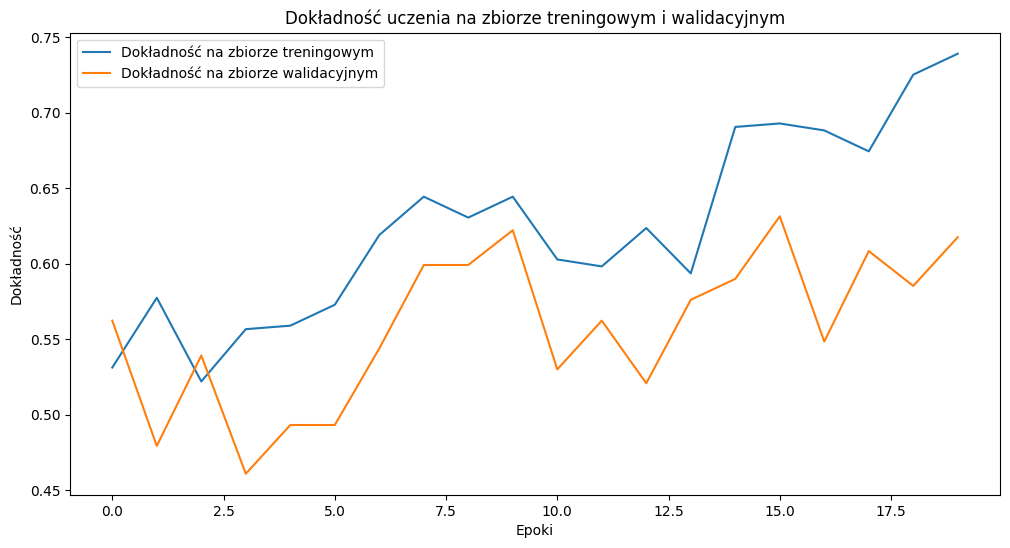

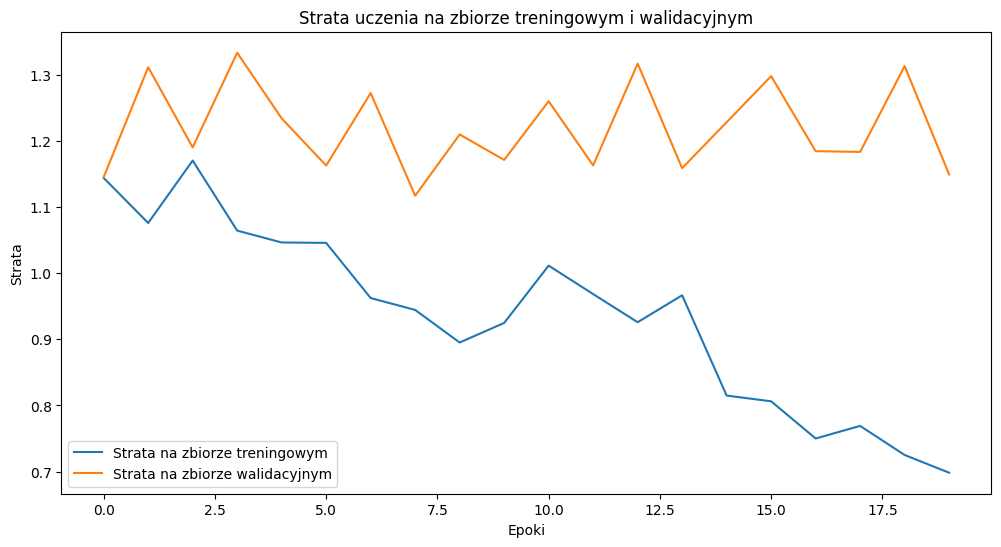

Model zapisany do pliku: /content/drive/MyDrive/KUL/Laby7/final_model.keras


In [ ]:
# Importy do wykresów i metryk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Obliczanie i wyświetlanie metryk klasyfikacyjnych dla zbioru walidacyjnego i testowego

# Metryki na zbiorze walidacyjnym
val_generator.reset()
val_predictions = model.predict(val_generator)
val_predicted_classes = np.argmax(val_predictions, axis=1)
val_true_classes = val_generator.classes
val_class_labels = list(val_generator.class_indices.keys())
print("Metryki klasyfikacyjne dla zbioru walidacyjnego:")
print(classification_report(val_true_classes, val_predicted_classes, target_names=val_class_labels))

# Metryki na zbiorze testowym
test_generator.reset()
test_predictions = model.predict(test_generator)
test_predicted_classes = np.argmax(test_predictions, axis=1)
test_true_classes = test_generator.classes
print("Metryki klasyfikacyjne dla zbioru testowego:")
print(classification_report(test_true_classes, test_predicted_classes, target_names=val_class_labels))

# Wykres dokładności i straty dla zbiorów treningowego i walidacyjnego

# Wykres dokładności
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Dokładność na zbiorze treningowym')
plt.plot(history.history['val_accuracy'], label='Dokładność na zbiorze walidacyjnym')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.legend()
plt.title('Dokładność uczenia na zbiorze treningowym i walidacyjnym')
plt.show()

# Wykres straty
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Strata na zbiorze treningowym')
plt.plot(history.history['val_loss'], label='Strata na zbiorze walidacyjnym')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.title('Strata uczenia na zbiorze treningowym i walidacyjnym')
plt.show()

# Macierz pomyłek dla zbioru testowego

conf_matrix = confusion_matrix(test_true_classes, test_predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=val_class_labels, yticklabels=val_class_labels)
plt.xlabel('Predykcje')
plt.ylabel('Prawdziwe etykiety')
plt.title('Macierz pomyłek na zbiorze testowym')
plt.show()

# Zapis modelu do pliku
model_save_path = '/content/drive/MyDrive/KUL/Laby7/final_model.keras'  # Ścieżka zapisu pełnego modelu
model.save(model_save_path)
print(f"Model zapisany do pliku: {model_save_path}")

1. Dokładność i strata dla zbiorów treningowego i walidacyjnego pokazują, czy model dobrze generalizuje.
2. Macierz pomyłek na zbiorze testowym pokazuje, które klasy są najczęściej mylone. Analiza tych wyników pozwala lepiej zrozumieć obszary, w których model ma problemy.
3. Jeżeli model osiąga wysoką dokładność na zbiorze treningowym, ale niską na walidacyjnym, może to oznaczać przeuczenie.
4. Model został zapisany do pliku, co umożliwia jego późniejsze wczytanie i wykorzystanie bez konieczności ponownego trenowania.

In [ ]:
# Maksymalna wartość punktów za Zad 7.4: 10
punkty.append(10)

In [ ]:
razem = sum(punkty)
razem_pr = razem/max
if razem_pr >= 0.90:
  ocena = 5
elif razem_pr >= 0.80:
  ocena = 4.5
elif razem_pr >= 0.70:
  ocena = 4
elif razem_pr >= 0.60:
  ocena = 3.5
elif razem_pr >= 0.50:
  ocena = 3
else:
  ocena = 2

print("Punktacja za kolejne zadania: ", punkty)
print("Suma punktów: ", razem)
print("Udział procentowy: ", razem_pr*100, "%")
print("Ocena: ", ocena)

Punktacja za kolejne zadania:  [15, 10, 10, 10]
Suma punktów:  45
Udział procentowy:  100.0 %
Ocena:  5
